LEVEL- 1
Idea: Cleaning Data

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Display the first few rows
print(df.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [ ]:
# Check data types
print(df.dtypes)

# Convert date columns to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Display summary statistics
print(df.describe(include='all'))


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
                  id            name       host_id host_name  \
count   4.889500e+04           48879  4.889500e+04     48874   
unique           NaN           47905           NaN     11452   
top              NaN  Hillside Hotel           NaN   Michael   
freq             NaN              18           NaN       4

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values
# Example: Filling missing values in 'reviews_per_month' with the median
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

# Example: Dropping rows where 'last_review' is missing
df.dropna(subset=['last_review'], inplace=True)


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [ ]:
# Standardize 'price' to float
df['price'] = df['price'].astype(float)

# Example: Standardize 'room_type' to lowercase
df['room_type'] = df['room_type'].str.lower()

# Display unique values to check consistency
print(df['room_type'].unique())


['private room' 'entire home/apt' 'shared room']


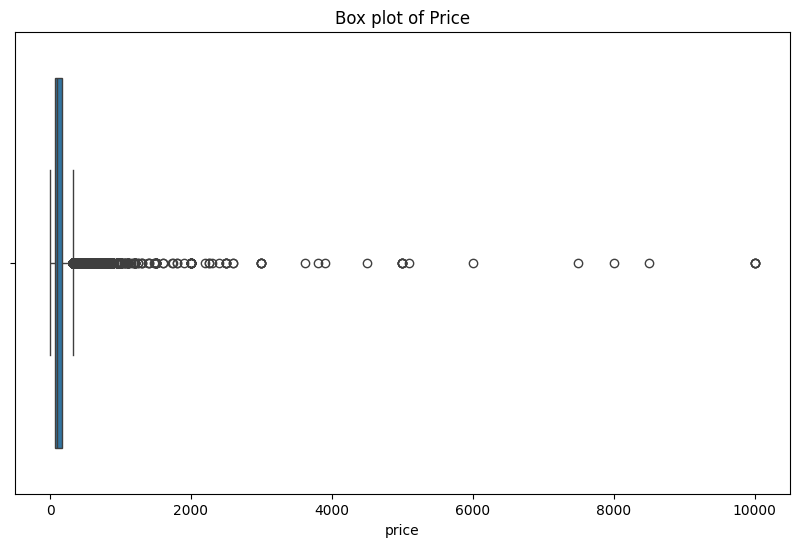

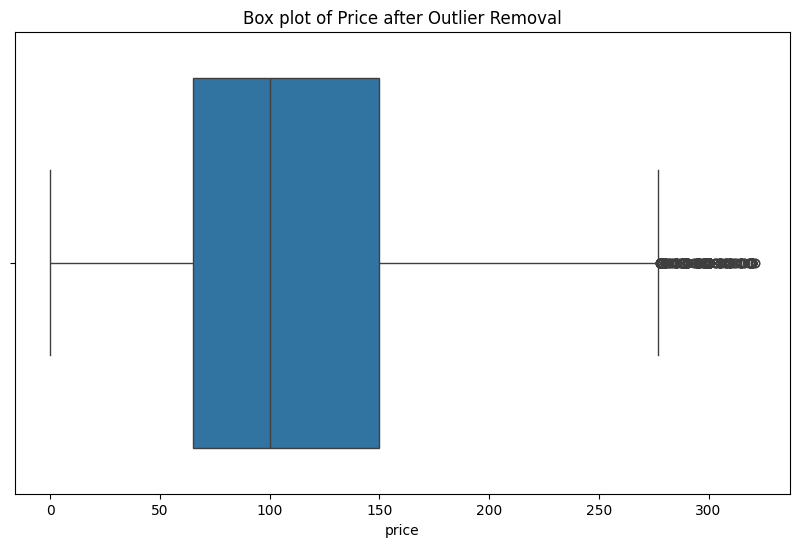

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers in the 'price' column using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box plot of Price')
plt.show()

# Example: Remove outliers outside 1.5*IQR range
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Verify the changes
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box plot of Price after Outlier Removal')
plt.show()
